In [872]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support

import pickle



#os.chdir('C:\\Users\\infoa\\Desktop\\mtx')  # please save the train and test data in your working directory before you run this noteook

# Basic analysis of the data

In [729]:
df = pd.read_csv('capstone_train.csv') # train data
df_test = pd.read_csv('capstone_test.csv') # test data
df.info() # train data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464809 entries, 0 to 464808
Data columns (total 13 columns):
Heigh_From_Sea_Level                 464809 non-null int64
Aspect                               464809 non-null int64
Slope                                464809 non-null int64
Distance_To_Water_Source             464809 non-null int64
Standing_Distance_To_Water_Source    464809 non-null int64
Distance_To_Road                     464809 non-null int64
Shadow_In_Morning                    464809 non-null int64
Shadow_In_Midday                     371776 non-null float64
Shadow_In_Evening                    464809 non-null int64
Distance_To_Fire                     464809 non-null int64
Turf                                 464809 non-null int64
Neighbourhood_Type                   464809 non-null int64
Plant_Type                           464809 non-null object
dtypes: float64(1), int64(11), object(1)
memory usage: 46.1+ MB


In [730]:
df.isnull().sum()

Heigh_From_Sea_Level                     0
Aspect                                   0
Slope                                    0
Distance_To_Water_Source                 0
Standing_Distance_To_Water_Source        0
Distance_To_Road                         0
Shadow_In_Morning                        0
Shadow_In_Midday                     93033
Shadow_In_Evening                        0
Distance_To_Fire                         0
Turf                                     0
Neighbourhood_Type                       0
Plant_Type                               0
dtype: int64

From the above cell, we can see the missing values of 93033 in the 'Shadow_In_Midday' variable.

# Plot missing values across training data

Text(0.5, 1, "Missing values - Nan's")

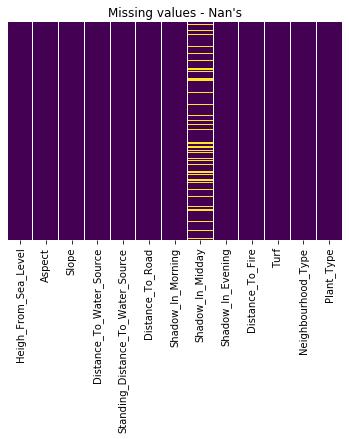

In [731]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')
plt.title("Missing values - Nan's")

# Missing Values Imputation 
We will impute the missing values with a linear regression model created with 'Shadow_In_Midday' 
as dependent variable, - we will also exlclude the 'Plant_Type' -Variable from the linear model -the missing values shall be independent from 'Plant_Type' variable  

In [732]:
df_mid = df.dropna(axis =0)
df_mid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371776 entries, 0 to 464808
Data columns (total 13 columns):
Heigh_From_Sea_Level                 371776 non-null int64
Aspect                               371776 non-null int64
Slope                                371776 non-null int64
Distance_To_Water_Source             371776 non-null int64
Standing_Distance_To_Water_Source    371776 non-null int64
Distance_To_Road                     371776 non-null int64
Shadow_In_Morning                    371776 non-null int64
Shadow_In_Midday                     371776 non-null float64
Shadow_In_Evening                    371776 non-null int64
Distance_To_Fire                     371776 non-null int64
Turf                                 371776 non-null int64
Neighbourhood_Type                   371776 non-null int64
Plant_Type                           371776 non-null object
dtypes: float64(1), int64(11), object(1)
memory usage: 39.7+ MB


In [733]:
df_mid.corr()

,Heigh_From_Sea_Level,Aspect,Slope,Distance_To_Water_Source,Standing_Distance_To_Water_Source,Distance_To_Road,Shadow_In_Morning,Shadow_In_Midday,Shadow_In_Evening,Distance_To_Fire,Turf,Neighbourhood_Type
Heigh_From_Sea_Level,1.000000,0.015753,-0.242744,0.306519,0.092915,0.365066,0.111954,0.205644,0.059159,0.148177,0.689411,-0.314756
Aspect,0.015753,1.000000,0.079114,0.018315,0.071035,0.024706,-0.579184,0.335841,0.646815,-0.108379,0.007529,0.139486
Slope,-0.242744,0.079114,1.000000,-0.010316,0.275154,-0.216530,-0.326829,-0.527355,-0.176102,-0.185294,-0.106831,0.285974
Distance_To_Water_Source,0.306519,0.018315,-0.010316,1.000000,0.606412,0.073995,-0.028342,0.048402,0.054140,0.053339,0.194573,0.056061
Standing_Distance_To_Water_Source,0.092915,0.071035,0.275154,0.606412,1.000000,-0.045849,-0.167799,-0.109071,0.037190,-0.069089,0.070640,0.189192
Distance_To_Road,0.365066,0.024706,-0.216530,0.073995,-0.045849,1.000000,0.034677,0.189978,0.106148,0.331785,0.239639,-0.445204
Shadow_In_Morning,0.111954,-0.579184,-0.326829,-0.028342,-0.167799,0.034677,1.000000,0.010399,-0.780590,0.132657,0.041431,-0.234783
Shadow_In_Midday,0.205644,0.335841,-0.527355,0.048402,-0.109071,0.189978,0.010399,1.000000,0.593801,0.057337,0.015144,-0.080881
Shadow_In_Evening,0.059159,0.646815,-0.176102,0.054140,0.037190,0.106148,-0.780590,0.593801,1.000000,-0.048203,-0.000589,0.106297
Distance_To_Fire,0.148177,-0.108379,-0.185294,0.053339,-0.069089,0.331785,0.132657,0.057337,-0.048203,1.000000,0.100563,-0.417137


# From the above correlation matrix
We can notice that the Variables - 'Turf' and 'Neighbourhood_Type' has very low correlation with
the 'Shadow_In_Midday' Variable. And at the same time those two variables are also discrete in nature. I would like to build a model pure linear model based on continous variables to predict the missing values. 
So, We will exclude the those two variables along with 'Plant_Type' Variable

In [734]:
df_mid.drop(['Turf', 'Neighbourhood_Type', 'Plant_Type'], axis =1, inplace = True )

C:\Users\infoa\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [735]:
y = df_mid.Shadow_In_Midday
x = df_mid.drop(['Shadow_In_Midday'], axis = 1)

# Standardise the data

In [736]:

sc = StandardScaler()
sc.fit(x) # fit the data
x =sc.transform(x)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=42)

# Build the linear model for missing values

training error: 10.002003300025292
testing error : 9.383863000969948


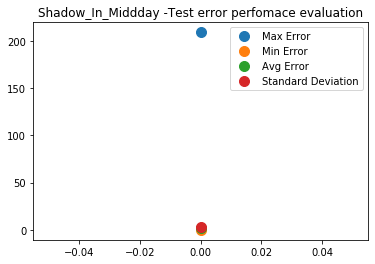

In [737]:
model_mid = LinearRegression()
model_mid.fit(x_train, y_train)

# prediction on test data and as well as train data
y_pred_test =  np.round_(model_mid.predict(x_test))
y_pred_test = np.clip(y_pred_test, a_min = 0, a_max = 255) # clapping values
y_pred_train =np.round_(model_mid.predict(x_train))
y_pred_train = np.clip(y_pred_train, a_min = 0, a_max = 255) # clapping values

# Compute Training and test error
linear_mse_train = mean_squared_error(y_train, y_pred_train)
linear_mse_test =  mean_squared_error(y_test, y_pred_test)
print('training error:', linear_mse_train) 
print('testing error :', linear_mse_test)

plt.plot(max(abs(y_test - y_pred_test)), 'o', markersize=10)
plt.plot(min(abs(y_test - y_pred_test)), 'o', markersize=10)
plt.plot(sum(abs(y_test - y_pred_test)/len(y_test)), 'o', markersize=10)
plt.plot(np.sqrt(sum((y_test-y_pred_test)**2)/(len(y_test)-1)), 'o', markersize = 10)
plt.title('Shadow_In_Middday -Test error perfomace evaluation')
plt.legend(['Max Error', 'Min Error', 'Avg Error', 'Standard Deviation'])

# From the above training & testing error and the graph.
We can conlude the error is quite low. And the model predicts the missing values very accurately.
So we can go forward with this model to impute missing values with good confidence

# Impute Missing values and creat new dataset for training set. 
I dont want to disturbe the original data set.

In [738]:
missing_values = df[~df.index.isin(df_mid.index)]
x = missing_values.drop(['Shadow_In_Midday', 'Turf', 'Neighbourhood_Type', 'Plant_Type'], axis = 1)
x = sc.transform(x)
shadow_mid =  np.round_(model_mid.predict(x))
shadow_mid = np.clip(shadow_mid, a_min = 0, a_max = 255) # clapping values

In [739]:
missing_values.Shadow_In_Midday = shadow_mid
missing_values.Shadow_In_Midday
shadow_column = pd.concat([df_mid.Shadow_In_Midday, missing_values.Shadow_In_Midday], axis = 0, ignore_index = False)

C:\Users\infoa\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [740]:
new_df = df.drop(['Shadow_In_Midday'], axis = 1)
new_df = pd.concat([new_df, shadow_column], axis = 1, ignore_index = False)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 464809 entries, 0 to 464808
Data columns (total 13 columns):
Heigh_From_Sea_Level                 464809 non-null int64
Aspect                               464809 non-null int64
Slope                                464809 non-null int64
Distance_To_Water_Source             464809 non-null int64
Standing_Distance_To_Water_Source    464809 non-null int64
Distance_To_Road                     464809 non-null int64
Shadow_In_Morning                    464809 non-null int64
Shadow_In_Evening                    464809 non-null int64
Distance_To_Fire                     464809 non-null int64
Turf                                 464809 non-null int64
Neighbourhood_Type                   464809 non-null int64
Plant_Type                           464809 non-null object
Shadow_In_Midday                     464809 non-null float64
dtypes: float64(1), int64(11), object(1)
memory usage: 49.6+ MB


# Label encoding

In [741]:
labelencoder = LabelEncoder()
new_df['Plant_Type'] = labelencoder.fit_transform(new_df['Plant_Type'])

# Study and Visualize the correlation among variables in training data

In [742]:
corr_matrix = new_df.drop(['Turf','Neighbourhood_Type', 'Plant_Type'], axis = 1).corr()
corr_matrix

,Heigh_From_Sea_Level,Aspect,Slope,Distance_To_Water_Source,Standing_Distance_To_Water_Source,Distance_To_Road,Shadow_In_Morning,Shadow_In_Evening,Distance_To_Fire,Shadow_In_Midday
Heigh_From_Sea_Level,1.000000,0.016035,-0.241253,0.306403,0.093903,0.365264,0.111430,0.058855,0.147503,0.205371
Aspect,0.016035,1.000000,0.078874,0.018079,0.070650,0.024281,-0.579443,0.646862,-0.108466,0.336653
Slope,-0.241253,0.078874,1.000000,-0.010676,0.274438,-0.215430,-0.326809,-0.175916,-0.184452,-0.528337
Distance_To_Water_Source,0.306403,0.018079,-0.010676,1.000000,0.606458,0.073062,-0.028004,0.053260,0.053350,0.047320
Standing_Distance_To_Water_Source,0.093903,0.070650,0.274438,0.606458,1.000000,-0.045229,-0.166582,0.036040,-0.068878,-0.109753
Distance_To_Road,0.365264,0.024281,-0.215430,0.073062,-0.045229,1.000000,0.034411,0.105629,0.331770,0.189486
Shadow_In_Morning,0.111430,-0.579443,-0.326809,-0.028004,-0.166582,0.034411,1.000000,-0.780706,0.132460,0.009702
Shadow_In_Evening,0.058855,0.646862,-0.175916,0.053260,0.036040,0.105629,-0.780706,1.000000,-0.048473,0.595711
Distance_To_Fire,0.147503,-0.108466,-0.184452,0.053350,-0.068878,0.331770,0.132460,-0.048473,1.000000,0.056910
Shadow_In_Midday,0.205371,0.336653,-0.528337,0.047320,-0.109753,0.189486,0.009702,0.595711,0.056910,1.000000


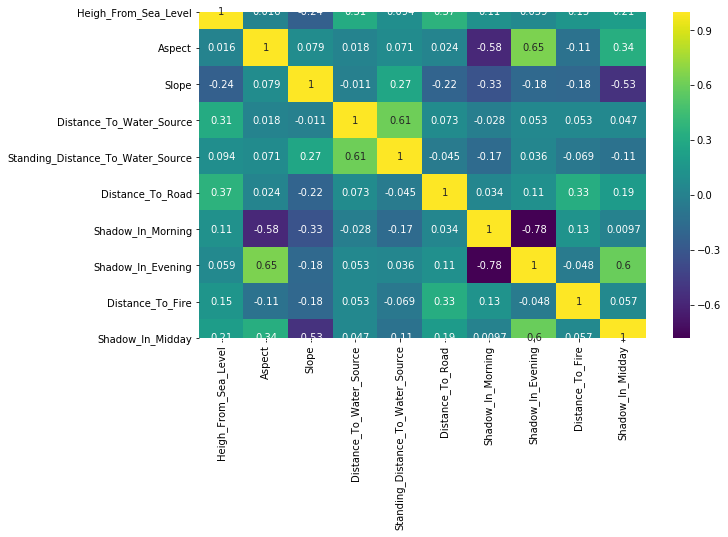

In [743]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap = 'viridis')

# From the above correlation matrix, we can notice the strong correlation among the variables - 
Shadow in evening & Aspect, Shadow in morning & Aspect,Shadow in morning and shadow in evening. We can drop couple of correlate variables to avoid duplication in the model. 
But I would like to retain all the variables to protect all the information being produced by variables. For your Information I have dropped the discrete variables 'Turf' , 'Neighbourhood' from the correlation matrix.
Because drawing correlation information between continous and discrete variables is not logical. Expect in few cases where discrete has only two values. 

# Plot distribution plots for variables

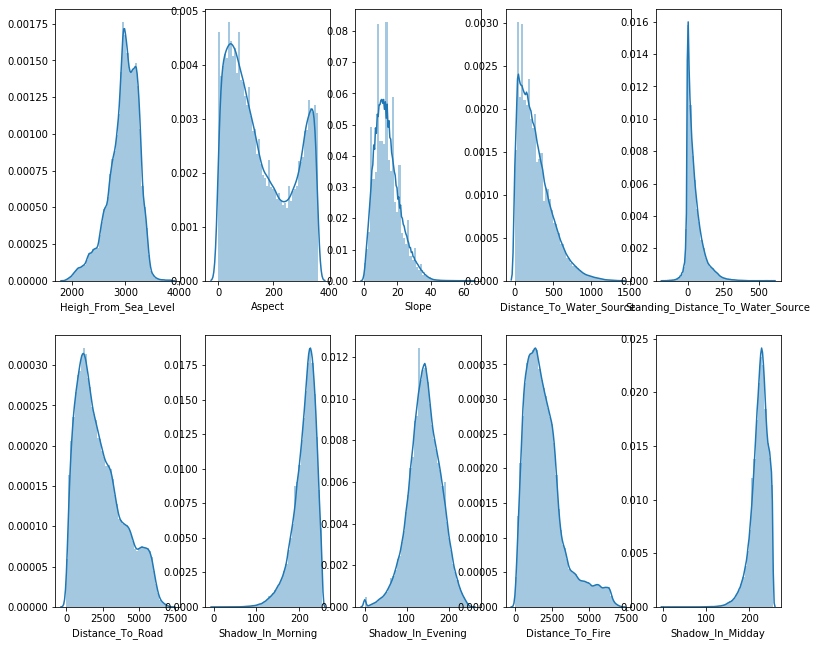

In [744]:
fig, axes = plt.subplots(2,5, figsize = ((13, 11)))
#plt.subplots(3,4, figsize = ((13, 11)))
dist_df = new_df.drop(['Turf','Neighbourhood_Type', 'Plant_Type'], axis = 1)
for i in range(0,2):
    for j in range(0,5):
            sns.distplot(dist_df.iloc[:,5*i+j],kde=True, ax=axes[i,j]) 
            

# From the above distribution plots
Some of the variables are extremely skewed either to right or left. We can solve the problem 
of skewnewss by applying log on variables. But I would like to retaing the originality of datset. So I would choose not to transform the variables.

# Plot boxplot - to check outliers

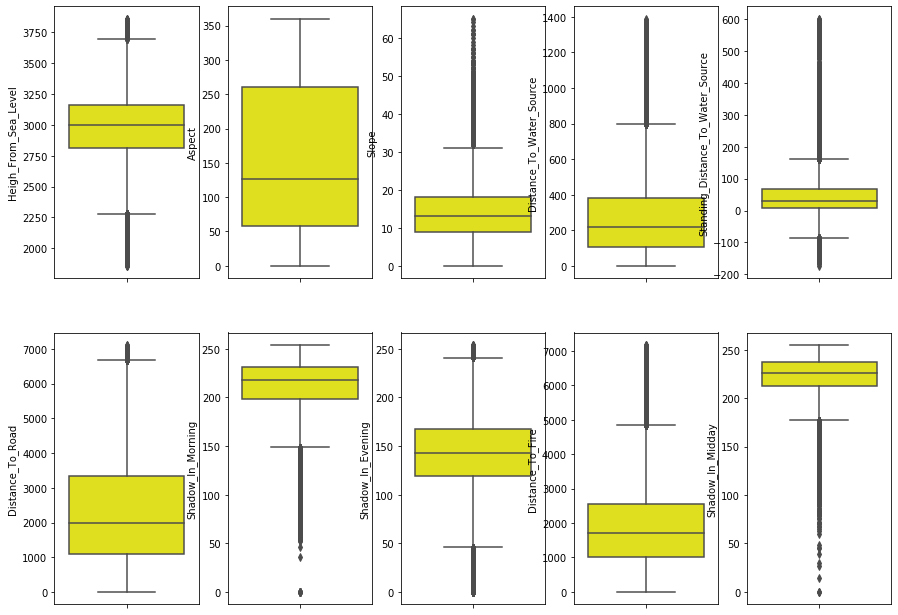

In [745]:
fig, axes = plt.subplots(2,5, figsize = ((15, 11)))
for i in range(0,2):
    for j in range(0,5):
        sns.boxplot(dist_df.iloc[:,5*i+j],color ='yellow', orient = 'v', ax=axes[i,j]) 
            

# As per the boxplot -
the only variable - Aspect contain no outliers, rest all contain good amount of variables. For me an outlier is something an unexpected value in the data set. I dont see any strange values in the data set.
So, we would not be doing any outlier treatment. (Further explanation - Unxpected values are - An age of person can vary from 0 - 100, but if the dataset contains an value(age) - lets say 200 years , then it is an unexpected value. we didnt find any such values here)

# Plot Histograms - To check distribution of Turf and Neigbhourhood - Discrete Variables

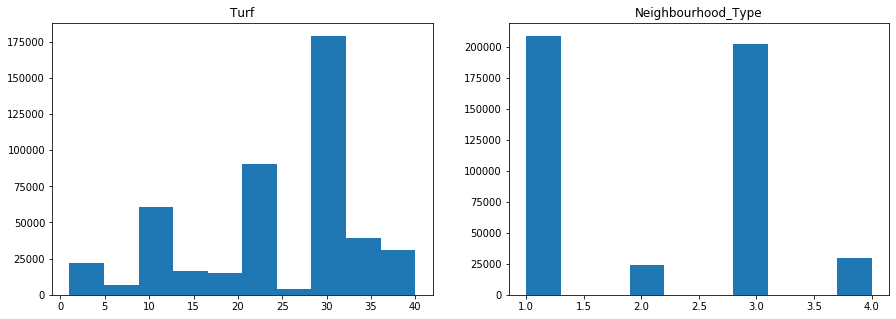

In [746]:
discrete_names = [ 'Turf','Neighbourhood_Type']
fig, axs = plt.subplots(1,2, figsize = ((15, 5)))
for i in range(0,2):
            axs[i].hist(new_df[discrete_names[i]])
            axs[i].set_title(discrete_names[i])
            

# Plot the bar plot (To understand the disribution of the Plant Types)

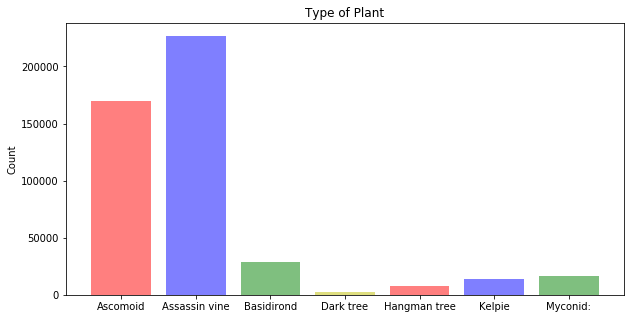

In [747]:
colours = ['r', 'b', 'g', 'y', 'r', 'b', 'g' ]
objects = labelencoder.inverse_transform(np.unique(new_df['Plant_Type']))
y_pos = np.arange(len(objects))
count = [new_df['Plant_Type'].value_counts()[i] for i in range(7)] 

plt.figure(figsize = (10,5))
plt.bar(y_pos, count, align='center', alpha= 0.5, color = colours)
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('Type of Plant')
plt.show()

# The distribution of the plant types are not even and uniform . 
So we shall be careful in building model and evaluating the results. The results may be baised and may produce higher accuracy because of the biased distribution of the plant types. So in addition to overall accuracy, individual class accuracy shall be taken under consideration.

# Resources Planning - Based on Sunlight and Water

In [748]:
total = pd.concat([df.dropna(axis =0), df_test.dropna(axis = 0)], axis = 0, ignore_index = True)
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464900 entries, 0 to 464899
Data columns (total 13 columns):
Heigh_From_Sea_Level                 464900 non-null int64
Aspect                               464900 non-null int64
Slope                                464900 non-null int64
Distance_To_Water_Source             464900 non-null int64
Standing_Distance_To_Water_Source    464900 non-null int64
Distance_To_Road                     464900 non-null int64
Shadow_In_Morning                    464900 non-null int64
Shadow_In_Midday                     464900 non-null float64
Shadow_In_Evening                    464900 non-null int64
Distance_To_Fire                     464900 non-null int64
Turf                                 464900 non-null int64
Neighbourhood_Type                   464900 non-null int64
Plant_Type                           464900 non-null object
dtypes: float64(1), int64(11), object(1)
memory usage: 46.1+ MB


In [749]:
total['Avg_Sun_light'] = (total['Shadow_In_Morning'] + total['Shadow_In_Midday'] + total['Shadow_In_Evening'])/3
total['Avg_Distance_water'] = (total['Distance_To_Water_Source'] + total['Standing_Distance_To_Water_Source'])/2
total['Plant_Type'] = labelencoder.transform(total['Plant_Type'])

In [750]:
plant_list = []
for i in range(7):
    resources = total[total['Plant_Type'] == i]
    x = np.round_(sum(resources['Shadow_In_Morning'])/len(resources))
    y = np.round_(sum(resources['Shadow_In_Midday'])/len(resources))
    z = np.round_(sum(resources['Shadow_In_Evening'])/len(resources))
    a = np.round_(sum(resources['Avg_Sun_light'])/len(resources))
    b = np.round_(sum(resources['Distance_To_Water_Source'])/len(resources))
    c = np.round_(sum(resources['Standing_Distance_To_Water_Source'])/len(resources))
    d = np.round_(sum(resources['Avg_Distance_water'])/len(resources))
    

    plant_list.append([x,y,z,a,b,c,d])
    

resources = pd.DataFrame(plant_list, columns = ['Avg_Shadow_Morning', 'Avg_Shadow_Midday', 'Avg_Shadow_Evening',
                                               'Avg_Sun_Light_In_Day', 'Avg_Distance_to_Water_Source' , 'Avg_Standing_Distance_to_Water_Source','Avg_Combined_Distance_Water_To_Source'], index = labelencoder.inverse_transform(np.unique(total['Plant_Type'])))

resources

,Avg_Shadow_Morning,Avg_Shadow_Midday,Avg_Shadow_Evening,Avg_Sun_Light_In_Day,Avg_Distance_to_Water_Source,Avg_Standing_Distance_to_Water_Source,Avg_Combined_Distance_Water_To_Source
Ascomoid,212.0,223.0,144.0,193.0,271.0,271.0,156.0
Assassin vine,214.0,225.0,143.0,194.0,280.0,280.0,163.0
Basidirond,202.0,216.0,140.0,186.0,210.0,210.0,136.0
Dark tree,229.0,217.0,111.0,185.0,106.0,106.0,73.0
Hangman tree,224.0,219.0,122.0,188.0,212.0,212.0,131.0
Kelpie,193.0,210.0,148.0,184.0,160.0,160.0,103.0
Myconid:,217.0,222.0,135.0,191.0,359.0,359.0,214.0


# The above table gives information 
about the average sun light and Average water distance required for each plant type. Most of the Plant Types require more or less same range of sun light.
But the Average distance from water sources varies for some of the plant types. The Plant type - Dark Tree- has low average- implies the near by water sources is a must for this plant.
Where as Myconid has high average of distance from water sources - implies this plant can survive in dry conditions too.
Note: Becuase of small Typo in the code- the Standing average  distance and the regular average distance variables displays the same results. However Now, I changed the correcting in the code. But I am not running the code again, becuase of the time constraints.

# Plot the averages of each plant

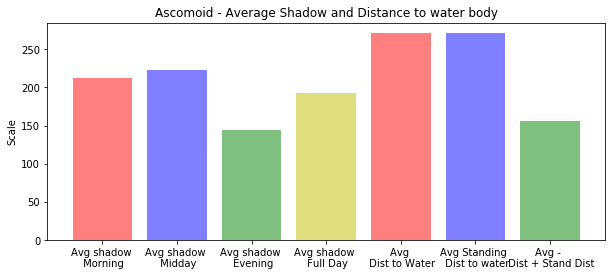

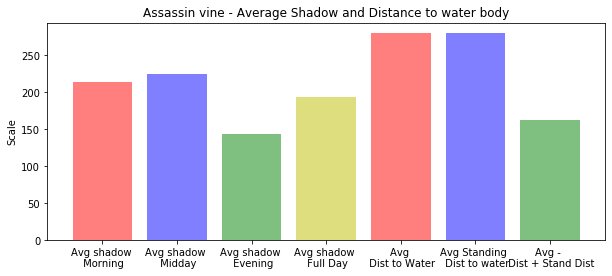

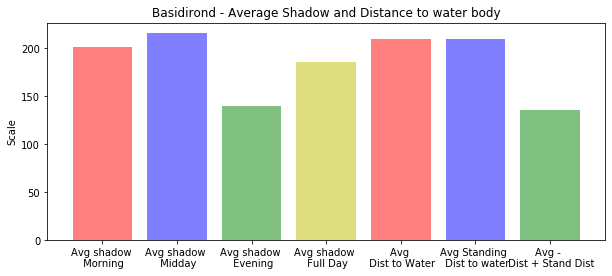

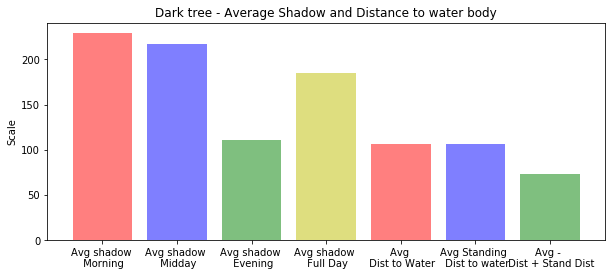

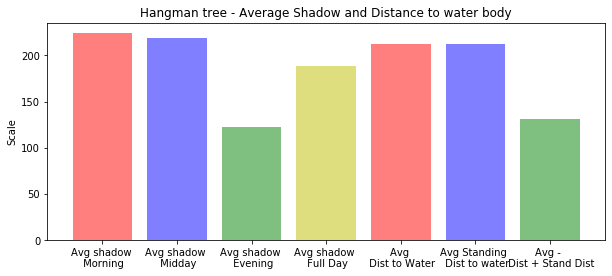

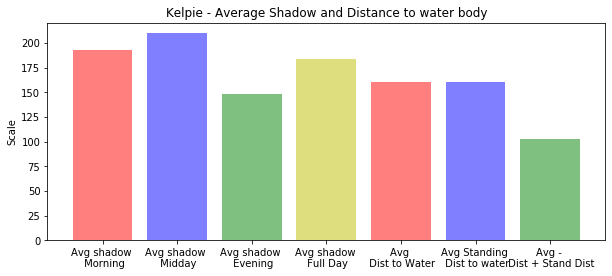

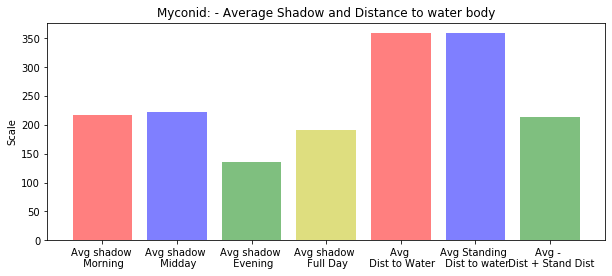

In [751]:
colours = ['r', 'b', 'g', 'y', 'r', 'b', 'g' ]
for i in range(7):
    plt.figure(figsize = (10,4))
    objects = ['Avg shadow \n Morning', 'Avg shadow \n Midday', 'Avg shadow \n Evening', 'Avg shadow \n Full Day', 'Avg \n Dist to Water', 'Avg Standing \n Dist to water', 'Avg - \n Dist + Stand Dist']    
    y_pos = np.arange(len(objects))
    count = resources.values[i]
    plt.bar(y_pos, count, align='center', alpha= 0.5, color = colours)
    plt.xticks(y_pos, objects)
    plt.ylabel('Scale')
    plt.title(resources.index[i] + ' - Average Shadow and Distance to water body')


# Construct PCA to check the class separation in lower dimension space

Expained Variance ratio : [26. 21. 17. 11.  8.  5.  5.  4.  3.  0.]


Text(0.5, 1.0, 'Principal Componenets Variance')

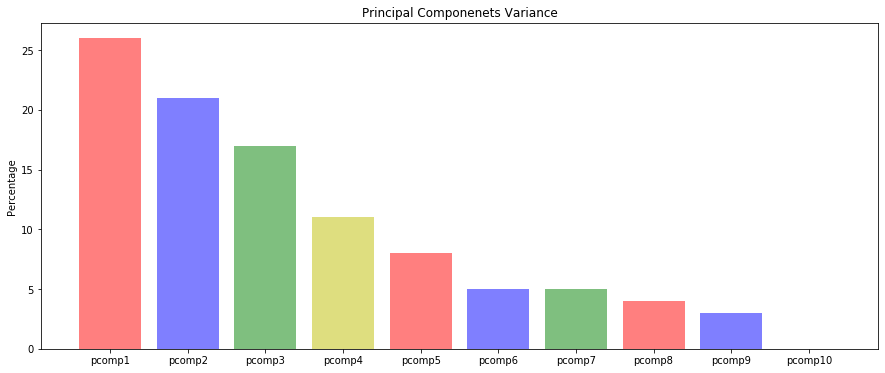

In [755]:
pca = PCA()
pca_data = new_df.drop(['Plant_Type', 'Turf', 'Neighbourhood_Type'], axis = 1)
sc1 = StandardScaler()
pca_data = sc1.fit_transform(pca_data)
pComp = pca.fit_transform(pca_data)
variance = np.round_(pca.explained_variance_ratio_, 2)*100
print('Expained Variance ratio :',variance)

colours = ['r', 'b', 'g', 'y', 'r', 'b', 'g' ]
plt.figure(figsize = (15,6))
objects = ['pcomp' + str(i) for i in range(1,11)]    
y_pos = np.arange(len(objects))
count = variance
plt.bar(y_pos, count, align='center', alpha= 0.5, color = colours)
plt.xticks(y_pos, objects)
plt.ylabel('Percentage')
plt.title('Principal Componenets Variance')

# From the above Principal components plot.
We can figure out that - That all of prinicpal components are important in order to explain significant variation in the data expect the last three components.

# Plot the 2 prinicipal Components to check the class separations 

C:\Users\infoa\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


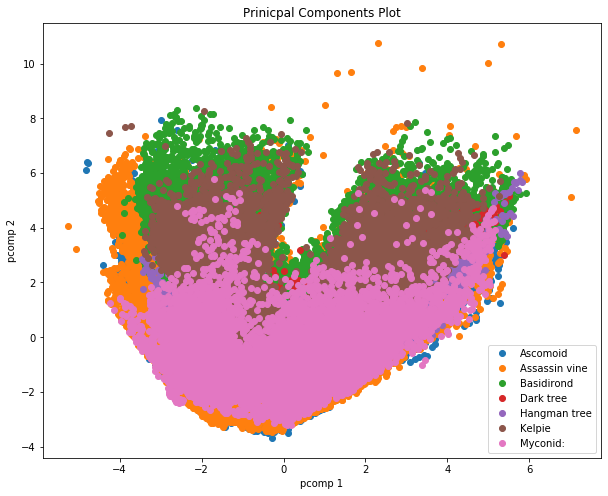

In [756]:
pdf = pd.DataFrame(data = pComp, columns = objects)
pdf = pd.concat([pdf['pcomp1'], pdf['pcomp2'], new_df['Plant_Type']], axis = 1)


plt.figure(figsize = (10, 8))
for i in range(7):
    plt.plot(pdf[pdf['Plant_Type'] == i]['pcomp1'], pdf[pdf['Plant_Type'] == i]['pcomp2'], 'o' )

plt.xlabel('pcomp 1')
plt.ylabel('pcomp 2')
plt.title('Prinicpal Components Plot')
plt.legend(resources.index)
plt.show()



# From the above PCA plot- 
We can undertsand that the classes are highly overlapped on each other. So to my understanding , Building a linear models - like logistic regression, neural network may not produce high accuracy. 
For such type of data a decision tree type classifier workes better. So we will build a Random Forest Classifier for the data and check the results. Later we will move to the other models. 

# Random Forest Classifier

Before building a model, Lets prepare the data - We have already imputed the missing values in train data. Lets check the test data and replace missing values in test data, if any, and impute the missing values with a linear regression model, what we did in the case of training data.

In [757]:
df_test.isnull().sum()

Heigh_From_Sea_Level                     0
Aspect                                   0
Slope                                    0
Distance_To_Water_Source                 0
Standing_Distance_To_Water_Source        0
Distance_To_Road                         0
Shadow_In_Morning                        0
Shadow_In_Midday                     23079
Shadow_In_Evening                        0
Distance_To_Fire                         0
Turf                                     0
Neighbourhood_Type                       0
Plant_Type                               0
dtype: int64

In [758]:
missing_values = df_test[~df_test.index.isin(df_test.dropna().index)]
x = missing_values.drop(['Shadow_In_Midday', 'Turf', 'Neighbourhood_Type', 'Plant_Type'], axis = 1)
x = sc.transform(x)
shadow_mid =  np.round_(model_mid.predict(x))
shadow_mid = np.clip(shadow_mid, a_min = 0, a_max = 255) # clapping values

missing_values.Shadow_In_Midday = shadow_mid
df_test = pd.concat([df_test.dropna(), missing_values], axis = 0, ignore_index = False)

C:\Users\infoa\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [777]:
df_test['Plant_Type'] = labelencoder.transform(df_test['Plant_Type'])
full_df = pd.concat([new_df, df_test], axis = 0, ignore_index = True) # combine test data and train data
full_df.info()

C:\Users\infoa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 13 columns):
Aspect                               581012 non-null int64
Distance_To_Fire                     581012 non-null int64
Distance_To_Road                     581012 non-null int64
Distance_To_Water_Source             581012 non-null int64
Heigh_From_Sea_Level                 581012 non-null int64
Neighbourhood_Type                   581012 non-null int64
Plant_Type                           581012 non-null int32
Shadow_In_Evening                    581012 non-null int64
Shadow_In_Midday                     581012 non-null float64
Shadow_In_Morning                    581012 non-null int64
Slope                                581012 non-null int64
Standing_Distance_To_Water_Source    581012 non-null int64
Turf                                 581012 non-null int64
dtypes: float64(1), int32(1), int64(11)
memory usage: 55.4 MB


# Create Dummy Variables for discrete Variables - 'Turf' and 'Neighbourhood Type'

We will create dummy variables at once for test data and train data - For this purpose we have combined the test data and train data to full data in the previous step

In [778]:
Turf_dummy = pd.get_dummies(full_df['Turf'], prefix= 'Turf', prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=True, dtype=None)
Neighbour_dummy = pd.get_dummies(full_df['Neighbourhood_Type'], prefix= 'Neighbourhood', prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=True, dtype=None)
full_df = pd.concat([full_df.drop(['Turf','Neighbourhood_Type'], axis = 1), Turf_dummy, Neighbour_dummy], axis = 1)

Separate the Complete data to original train and test data

In [929]:
y_train = full_df[0 : 464808]['Plant_Type']
x_train = full_df[0 : 464808].drop(['Plant_Type'], axis = 1)

y_test = full_df[464809:]['Plant_Type']
x_test = full_df[464809:].drop(['Plant_Type'], axis = 1)


Standardize the data before we apply the model- We usually dont require for a Random forest classifier to standardize the data . But we will also build other models in the next section. For which we require Standardized data. So for smooth process - We will standardised the data. 

In [930]:
sc2 = StandardScaler()
sc2.fit(x_train)
x_train = sc2.transform(x_train)
x_test = sc2.transform(x_test)

# Hyperparameter Tuning & Fitting a model
Minimum samples Split, Minimum samples per leaf are the tuning parameters - for now.
Based on results we will add other parameters too.

In [885]:
train_accuracy = []
test_accuracy =  []
random_scores = []
train_f1_score = []
test_f1_score = []
for i in [5, 10, 15, 20, 25,  30, 35]:
    for j in [5, 10, 15, 20, 25, 30, 35]:

        random = RandomForestClassifier(n_estimators = 100, min_samples_split= i, min_samples_leaf= j, random_state = 42)
        random.fit(x_train, y_train)

        #training data evaluation
        y_pred_train = random.predict(x_train)
        rf_train_cm = confusion_matrix(y_train, y_pred_train)
        rf_train_accuracy = sum(np.diagonal(rf_train_cm))/np.sum(rf_train_cm)
        train_accuracy.append(rf_train_accuracy)
        fscore = f1_score(y_train, y_pred_train, average='micro')
        train_f1_score.append(fscore)

        #print("Random Forest Training Confusion Matrix : ","\n", rf_train_cm)
        print("Random Forest TrainingAccuracy: ", rf_train_accuracy) 


        #testing data evaluation
        y_pred_test = random.predict(x_test)
        rf_test_cm = confusion_matrix(y_test, y_pred_test)
        rf_test_accuracy = sum(np.diagonal(rf_test_cm))/np.sum(rf_test_cm)
        test_accuracy.append(rf_test_accuracy)
        fscore = f1_score(y_test, y_pred_test, average='micro')
        test_f1_score.append(fscore)


        #print("Random Forest Testing Confusion Matrix : ","\n", rf_test_cm)
        print("Random Forest Testing Accuracy: ", rf_test_accuracy)

        random_scores.append('i-'+str(i)+ ' j-' + str(j) )

Random Forest TrainingAccuracy:  0.9712956747732397
Random Forest Testing Accuracy:  0.9337114040824757
Random Forest TrainingAccuracy:  0.9436412454174627
Random Forest Testing Accuracy:  0.9154159925647999
Random Forest TrainingAccuracy:  0.9256746871826647
Random Forest Testing Accuracy:  0.9021892533819834
Random Forest TrainingAccuracy:  0.9106792482057108
Random Forest Testing Accuracy:  0.890769680905993
Random Forest TrainingAccuracy:  0.8984096659265761
Random Forest Testing Accuracy:  0.8802622973391622
Random Forest TrainingAccuracy:  0.8899889846990585
Random Forest Testing Accuracy:  0.8727410416164676
Random Forest TrainingAccuracy:  0.8817619318084026
Random Forest Testing Accuracy:  0.8665106192557915
Random Forest TrainingAccuracy:  0.9712956747732397
Random Forest Testing Accuracy:  0.9337114040824757
Random Forest TrainingAccuracy:  0.9436412454174627
Random Forest Testing Accuracy:  0.9154159925647999
Random Forest TrainingAccuracy:  0.9256746871826647
Random Forest

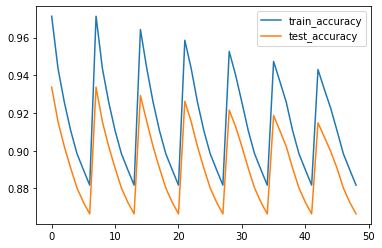

In [886]:
plt.plot(train_accuracy)
plt.plot(test_accuracy)
#plt.plot(train_f1_score)
#plt.plot(test_f1_score)
plt.legend(['train_accuracy', 'test_accuracy', 'train_f1_score', 'test_f1_score' ] )

The above experiement has produced decent results. we will choose few best models and will further fine tune them.  

In [910]:
index = test_accuracy.index(max(test_accuracy))
sorted_values = sorted(test_accuracy, reverse = True)[0:4]
model_parameters = []
for item in sorted_values: 
    index = test_accuracy.index(item)
    model_parameters.append(random_scores[index])
    test_accuracy[index] = round(test_accuracy[index], 3)
print(model_parameters)

['i-5 j-5', 'i-5 j-5', 'i-15 j-5', 'i-20 j-5']


# The above model with following parameter combinations  - 
Min Samples Split - [5, 10 and 15]  and Min Samples per Leaf - [5]- Has produce better results. So we will fine tune these parameters further along with the other new parameter - "Number of Trees" and choose best among them.
Note: There was a small typo in the code, so the list printed(model parameters) in the above cell contains "i-5" in the index position -1. where as it shall be 'i-10'. Because of time constrains , I dont run the code again - It is understood that the parameters we have to tune are i = 5, 10, 15 in the next step along with new parameter number of trees.    

In [915]:
train_accuracy = []
test_accuracy =  []
random_scores = []
train_f1_score = []
test_f1_score = []

for i in [5,10, 15,]:
            for trees in [300,200,100]:
                random = RandomForestClassifier(n_estimators = trees, min_samples_split= i, min_samples_leaf= 5, random_state = 42)
                random.fit(x_train, y_train)

                #training data evaluation
                y_pred_train = random.predict(x_train)
                rf_train_cm = confusion_matrix(y_train, y_pred_train)
                rf_train_accuracy = sum(np.diagonal(rf_train_cm))/np.sum(rf_train_cm)
                train_accuracy.append(rf_train_accuracy)
                fscore = f1_score(y_train, y_pred_train, average='micro')
                train_f1_score.append(fscore)

                #print("Random Forest Training Confusion Matrix : ","\n", rf_train_cm)
                print("Random Forest TrainingAccuracy: ", rf_train_accuracy) 


                #testing data evaluation
                y_pred_test = random.predict(x_test)
                rf_test_cm = confusion_matrix(y_test, y_pred_test)
                rf_test_accuracy = sum(np.diagonal(rf_test_cm))/np.sum(rf_test_cm)
                test_accuracy.append(rf_test_accuracy)
                fscore = f1_score(y_test, y_pred_test, average='micro')
                test_f1_score.append(fscore)


                #print("Random Forest Testing Confusion Matrix : ","\n", rf_test_cm)
                print("Random Forest Testing Accuracy: ", rf_test_accuracy)
                model_name =' trees -' + str(trees) + ' i-' + str(i)
                random_scores.append(model_name)
                print(model_name)
                print('\n')

Random Forest TrainingAccuracy:  0.9719497082666392
Random Forest Testing Accuracy:  0.9347870985508244
 trees -300 i-5


Random Forest TrainingAccuracy:  0.9719195883031273
Random Forest Testing Accuracy:  0.9347698874393309
 trees -200 i-5


Random Forest TrainingAccuracy:  0.9712956747732397
Random Forest Testing Accuracy:  0.9337114040824757
 trees -100 i-5


Random Forest TrainingAccuracy:  0.9719497082666392
Random Forest Testing Accuracy:  0.9347870985508244
 trees -300 i-10


Random Forest TrainingAccuracy:  0.9719195883031273
Random Forest Testing Accuracy:  0.9347698874393309
 trees -200 i-10


Random Forest TrainingAccuracy:  0.9712956747732397
Random Forest Testing Accuracy:  0.9337114040824757
 trees -100 i-10


Random Forest TrainingAccuracy:  0.9654480990000172
Random Forest Testing Accuracy:  0.9307252762383394
 trees -300 i-15


Random Forest TrainingAccuracy:  0.9653469819796561
Random Forest Testing Accuracy:  0.9306650373481119
 trees -200 i-15


Random Forest Train

# From the above results. 
The model has produced high accuracy with trees = 300 and minimum samples split = 5. So we will Fix the parameter Minumum samples split = 5. We will tune the model for 300 and 400 tress, by changing other parameters "max_features" = 52 and  "max_depth = 40".
Lets run the model...
Note: For the purpose of evaluation- We are considering testing accuracy along with training accuracy. Giving more priority to testing accuracy. Our goal . We shall improve the model test accuracy beyond 95%.

In [916]:
train_accuracy = []
test_accuracy =  []
random_scores = []
train_f1_score = []
test_f1_score = []

for i in [300,400]:
            random = RandomForestClassifier(n_estimators = trees, max_features = 52, max_depth = 40, min_samples_split= 5, min_samples_leaf= 5, random_state = 42)
            random.fit(x_train, y_train)

            #training data evaluation
            y_pred_train = random.predict(x_train)
            rf_train_cm = confusion_matrix(y_train, y_pred_train)
            rf_train_accuracy = sum(np.diagonal(rf_train_cm))/np.sum(rf_train_cm)
            train_accuracy.append(rf_train_accuracy)
            fscore = f1_score(y_train, y_pred_train, average='micro')
            train_f1_score.append(fscore)

            #print("Random Forest Training Confusion Matrix : ","\n", rf_train_cm)
            print("Random Forest TrainingAccuracy: ", rf_train_accuracy) 


            #testing data evaluation
            y_pred_test = random.predict(x_test)
            rf_test_cm = confusion_matrix(y_test, y_pred_test)
            rf_test_accuracy = sum(np.diagonal(rf_test_cm))/np.sum(rf_test_cm)
            test_accuracy.append(rf_test_accuracy)
            fscore = f1_score(y_test, y_pred_test, average='micro')
            test_f1_score.append(fscore)


            #print("Random Forest Testing Confusion Matrix : ","\n", rf_test_cm)
            print("Random Forest Testing Accuracy: ", rf_test_accuracy)
            model_name =' trees -' + str(i) 
            random_scores.append(model_name)
            print(model_name)
            print('\n')

Random Forest TrainingAccuracy:  0.9874442780675031
Random Forest Testing Accuracy:  0.9590031324222918
 trees -100


Random Forest TrainingAccuracy:  0.9874442780675031
Random Forest Testing Accuracy:  0.9590031324222918
 trees -100




# From the above results. 
We have achieved an accuracy of more than 95% in Testing in both cases - where trees = 300 and 400. But the accuracy did not improved with increase number of trees from 300 to 400. The accuracy remained same. So, we will cap the number of trees = 300.
Note: Sorry - There is a typo again - In the output - above cells - tress - shall be 300 and 400 - instead of 100 and 100. This is again because of typo in the code. All this typos are just printing typos- but not the core typos- so will not have any effect on the results
    
We will Further train the model on following Parameters : min_samples = 2 and min_samples_leaf = 2, keeping other parameters. Below.


In [918]:
train_accuracy = []
test_accuracy =  []
random_scores = []
train_f1_score = []
test_f1_score = []

random = RandomForestClassifier(n_estimators = 300, max_features = 52, max_depth = 40, min_samples_split= 2, min_samples_leaf= 2, random_state = 42)
random.fit(x_train, y_train)

#training data evaluation
y_pred_train = random.predict(x_train)
rf_train_cm = confusion_matrix(y_train, y_pred_train)
rf_train_accuracy = sum(np.diagonal(rf_train_cm))/np.sum(rf_train_cm)
train_accuracy.append(rf_train_accuracy)
fscore = f1_score(y_train, y_pred_train, average='micro')
train_f1_score.append(fscore)

#print("Random Forest Training Confusion Matrix : ","\n", rf_train_cm)
print("Random Forest TrainingAccuracy: ", rf_train_accuracy) 


#testing data evaluation
y_pred_test = random.predict(x_test)
rf_test_cm = confusion_matrix(y_test, y_pred_test)
rf_test_accuracy = sum(np.diagonal(rf_test_cm))/np.sum(rf_test_cm)
test_accuracy.append(rf_test_accuracy)
fscore = f1_score(y_test, y_pred_test, average='micro')
test_f1_score.append(fscore)


#print("Random Forest Testing Confusion Matrix : ","\n", rf_test_cm)
print("Random Forest Testing Accuracy: ", rf_test_accuracy)

Random Forest TrainingAccuracy:  0.9983003734875475
Random Forest Testing Accuracy:  0.9659822381329386


# Great We have improved our testing accuracy to 96.6%.
But This model may not produce similar results in unknwon conditions, Because of overffting - as we have grew the tree to minimum possible leafs and splits.
So We will choose the next best model. That is the model created in previous step with following parameters : n_estimators = 300, max_features = 52, max_depth = 40 , min_samples = 5 and min_saples = 5. 
    
So we will build the same model again to double check the results.

We will make this model as final model if the results are no better with other algorithms - Logistic Regression(Multi class) and Neural Networks in next section.

In [932]:
final_model = RandomForestClassifier(n_estimators = 300, max_features = 52, max_depth = 40, min_samples_split= 5, min_samples_leaf= 5, random_state = 42)
final_model.fit(x_train, y_train)

#training data evaluation
y_pred_train = final_model.predict(x_train)
rf_train_cm = confusion_matrix(y_train, y_pred_train)
rf_train_accuracy = sum(np.diagonal(rf_train_cm))/np.sum(rf_train_cm)
print("RF - Final Model - Training Confusion Matrix : ","\n", rf_train_cm)
print("RF - Final Model - TrainingAccuracy: ", rf_train_accuracy) 


#testing data evaluation
y_pred_test = final_model.predict(x_test)
rf_test_cm = confusion_matrix(y_test, y_pred_test)
rf_test_accuracy = sum(np.diagonal(rf_test_cm))/np.sum(rf_test_cm)

print("RF- Final Model-Testing Confusion Matrix : ","\n", rf_test_cm)
print("RF - Final Model -Testing Accuracy: ", rf_test_accuracy)        

RF - Final Model - Training Confusion Matrix :  
 [[167332   2009      0      0     12     13    121]
 [  1361 225014    133      3     92     73     28]
 [     0    156  28130     60      8    134      0]
 [     0      0    128   2015      0     41      0]
 [    32    448     52      0   7052     14      0]
 [     4     96    267     37      4  13523      0]
 [   340     54      0      0      2      0  16020]]
RF - Final Model - TrainingAccuracy:  0.9876895406275279
RF- Final Model-Testing Confusion Matrix :  
 [[40436  1798     2     0    13     9    95]
 [ 1299 55043    98     1    83    63     9]
 [    0   100  6993    32     5   136     0]
 [    0     0    70   475     0    18     0]
 [   19   272    31     0  1564     9     0]
 [    1    90   195    12     4  3134     0]
 [  200    19     0     0     0     0  3875]]
RF - Final Model -Testing Accuracy:  0.9596998356324707


# The Results are as expected. Now will try other models - Logistic Regression and Neural Network

# Logistic Regression

In [950]:
clf = LogisticRegression(max_iter= 200, solver = 'lbfgs', multi_class= 'multinomial')
clf.fit(x_train, y_train)

#training data evaluation
y_pred_train = clf.predict(x_train)
lcf_train_cm = confusion_matrix(y_train, y_pred_train)
lcf_train_accuracy = sum(np.diagonal(lcf_train_cm))/np.sum(lcf_train_cm)
print("Logistic Training Confusion Matrix : ","\n", lcf_train_cm)
print("Logistic TrainingAccuracy: ", lcf_train_accuracy) 

prf = precision_recall_fscore_support(y_train, y_pred_train, average = 'micro')
print('Precesision, Recall, Fscore :', prf)
print('\n')

#testing data evaluation

y_pred_test = clf.predict(x_test)
lcf_test_cm = confusion_matrix(y_test, y_pred_test)
lcf_test_accuracy = sum(np.diagonal(lcf_test_cm))/np.sum(lcf_test_cm)
print("Logistic Test Confusion Matrix : ","\n", lcf_test_cm)
print("Logistic Test Accuracy: ", lcf_test_accuracy)
prf1 = precision_recall_fscore_support(y_test, y_pred_test, average = 'micro')
print('Precesision, Recall, Fscore :', prf1)


C:\Users\infoa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Logistic Training Confusion Matrix :  
 [[118308  47627     31      0      0     66   3455]
 [ 40980 181608   2575      7    136   1280    118]
 [     0   2844  22933    463     14   2234      0]
 [     0      9    998    950      0    227      0]
 [    36   7262    224      0     38     38      0]
 [     0   3231   6916     55     11   3718      0]
 [  6857    150      0      0      0      0   9409]]
Logistic TrainingAccuracy:  0.7249530989139602
Precesision, Recall, Fscore : (0.7249530989139602, 0.7249530989139602, 0.7249530989139602, None)


Logistic Test Confusion Matrix :  
 [[29550 11927    12     0     1    18   845]
 [10314 45204   705     1    33   317    22]
 [    0   713  5830   144     2   577     0]
 [    0     1   255   239     0    68     0]
 [   12  1795    62     0    13    13     0]
 [    0   778  1787     7     4   860     0]
 [ 1791    30     0     0     0     0  2273]]
Logistic Test Accuracy:  0.7226061289295457
Precesision, Recall, Fscore : (0.7226061289295457, 0.

# As expected,
the Logistic Regression did not produced the results par with Random forest Model. Now lets explore Neural Networks.

# Neural Network 

we will create two hidden layers in the architecture with 32 neurons in first hidden layer and 16 neurons in second layer. The output layer will have seven neurons(each neuron for each class).
The activation functions we will try - 'Relu'- and 'LeakyRelu'. The optimizers we will try are - 'adam','RmsProp' and 'sgd'. 
We would like to run the model on complete batch rather than mini batches. The data is sufficent enough to run on complete batch. 


In [842]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation
from keras.utils import to_categorical

y_train_ = to_categorical(y_train, num_classes=7, dtype='float32')
# build ANN Model
model = Sequential()
model.add(Dense(32, input_dim=52, kernel_initializer='normal', activation='relu'))
model.add(Dense(16, kernel_initializer='normal', activation='relu'))
model.add(Dense(7, kernel_initializer='normal', activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.fit(x_train, y_train_, nb_epoch = 100)

Instructions for updating:
Use tf.cast instead.


C:\Users\infoa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  del sys.path[0]


Epoch 1/100
464808/464808 [==============================] - 65s 140us/step - loss: 0.6132
Epoch 2/100
464808/464808 [==============================] - 64s 138us/step - loss: 0.5427
Epoch 3/100
464808/464808 [==============================] - 63s 135us/step - loss: 0.5176
Epoch 4/100
464808/464808 [==============================] - 64s 137us/step - loss: 0.5016
Epoch 5/100
464808/464808 [==============================] - 62s 133us/step - loss: 0.4888
Epoch 6/100
464808/464808 [==============================] - 60s 129us/step - loss: 0.4794
Epoch 7/100
464808/464808 [==============================] - 61s 131us/step - loss: 0.4719
Epoch 8/100
464808/464808 [==============================] - 61s 132us/step - loss: 0.4650
Epoch 9/100
464808/464808 [==============================] - 62s 133us/step - loss: 0.4593
Epoch 10/100
464808/464808 [==============================] - 54s 116us/step - loss: 0.4546
Epoch 11/100
464808/464808 [==============================] - 525s 1ms/step - loss: 0.450

In [853]:
#training data evaluation
y_pred_train = model.predict_classes(x_train)
neural_train_cm = confusion_matrix(y_train, y_pred_train)
neural_train_accuracy = sum(np.diagonal(neural_train_cm))/np.sum(neural_train_cm)
print("Neural Training Confusion Matrix : ","\n", neural_train_cm)
print("Neural TrainingAccuracy: ", neural_train_accuracy) 

prf = precision_recall_fscore_support(y_train, y_pred_train, average = 'micro')
print('Precesision, Recall, Fscore :', prf)
print('\n')

#testing data evaluation

y_pred_test = model.predict_classes(x_test)
neural_test_cm = confusion_matrix(y_test, y_pred_test)
neural_test_accuracy = sum(np.diagonal(neural_test_cm))/np.sum(neural_test_cm)
print("Neural Test Confusion Matrix : ","\n", neural_test_cm)
print("Neural Test Accuracy: ", neural_test_accuracy)
prf1 = precision_recall_fscore_support(y_test, y_pred_test, average = 'micro')
print('Precesision, Recall, Fscore :', prf1)


Random Forest Training Confusion Matrix :  
 [[138794  27576     38      0    308     78   2693]
 [ 23238 196877   3164      0   1341   1699    385]
 [     1    710  26253    103     26   1395      0]
 [     0      0    877   1173      0    134      0]
 [   255   3309    433      0   3567     34      0]
 [    33   1052   5241     62      9   7534      0]
 [  1755    124      0      0      4      0  14533]]
Random Forest TrainingAccuracy:  0.8363259668508287
Precesision, Recall, Fscore : (0.8363259668508287, 0.8363259668508287, 0.8363259668508287, None)


Random Forest Test Confusion Matrix :  
 [[34517  7066    15     0    85    28   642]
 [ 5959 48949   823     0   331   446    89]
 [    0   169  6683    26     3   385     0]
 [    0     0   215   306     0    42     0]
 [   76   798   121     0   888    12     0]
 [    7   275  1308    10     4  1832     0]
 [  458    35     0     0     0     0  3601]]
Random Forest Test Accuracy:  0.8328112629513614
Precesision, Recall, Fscore : (0.

# Here the results of  Neural Network 
are better than Logistic Regression with a test accuracy of 0.83. 
However the results are not par with Random Forest Model.
The above model was trainned for 100 epochs. We can see in the training process above, after a certain point the loss was not improved significantly. This implies the algorithm reached its global minima.

Note: There is again a typo in printing in above output - It has printied Random Forest instead of Neural Network. Kindly apology for the typo's.

 We will try the same Neural Network architecture with optimizer = 'Rmsprop', below.

In [854]:
# build ANN Model
model1 = Sequential()
model1.add(Dense(32, input_dim=52, kernel_initializer='normal', activation='relu'))
model1.add(Dense(16, kernel_initializer='normal', activation='relu'))
model1.add(Dense(7, kernel_initializer='normal', activation='softmax'))
# Compile model
model1.compile(loss='categorical_crossentropy', optimizer='RmsProp')
model1.fit(x_train, y_train_, nb_epoch = 50)

C:\Users\infoa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/50
464808/464808 [==============================] - 19s 40us/step - loss: 0.6261
Epoch 2/50
464808/464808 [==============================] - 18s 39us/step - loss: 0.5566
Epoch 3/50
464808/464808 [==============================] - 19s 40us/step - loss: 0.5422
Epoch 4/50
464808/464808 [==============================] - 18s 40us/step - loss: 0.5365
Epoch 5/50
464808/464808 [==============================] - 18s 40us/step - loss: 0.5318
Epoch 6/50
464808/464808 [==============================] - 18s 38us/step - loss: 0.5264
Epoch 7/50
464808/464808 [==============================] - 16s 34us/step - loss: 0.5262
Epoch 8/50
464808/464808 [==============================] - 16s 34us/step - loss: 0.5279
Epoch 9/50
464808/464808 [==============================] - 16s 35us/step - loss: 0.5306
Epoch 10/50
464808/464808 [==============================] - 16s 35us/step - loss: 0.5348
Epoch 11/50
464808/464808 [==============================] - 16s 34us/step - loss: 0.5383
Epoch 12/50
464808/

In [858]:
# build ANN Model
from keras import optimizers
model2 = Sequential()
model2.add(Dense(32, input_dim=52, kernel_initializer='normal', activation='relu'))
model2.add(Dense(16, kernel_initializer='normal', activation='relu'))
model2.add(Dense(7, kernel_initializer='normal', activation='softmax'))
# Compile model
sgd = optimizers.SGD(lr= 0.1)
model2.compile(loss='categorical_crossentropy', optimizer= sgd)
model2.fit(x_train, y_train_, nb_epoch = 100)

C:\Users\infoa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/100
464808/464808 [==============================] - 18s 39us/step - loss: 0.5967
Epoch 2/100
464808/464808 [==============================] - 18s 38us/step - loss: 0.5047
Epoch 3/100
464808/464808 [==============================] - 18s 39us/step - loss: 0.4816
Epoch 4/100
464808/464808 [==============================] - 17s 37us/step - loss: 0.4686
Epoch 5/100
464808/464808 [==============================] - 16s 35us/step - loss: 0.4611
Epoch 6/100
464808/464808 [==============================] - 16s 35us/step - loss: 0.4551
Epoch 7/100
464808/464808 [==============================] - 16s 34us/step - loss: 0.4509
Epoch 8/100
464808/464808 [==============================] - 16s 35us/step - loss: 0.4475
Epoch 9/100
464808/464808 [==============================] - 15s 33us/step - loss: 0.4450
Epoch 10/100
464808/464808 [==============================] - 15s 33us/step - loss: 0.4430
Epoch 11/100
464808/464808 [==============================] - 16s 34us/step - loss: 0.4403
Epoch 12

In [863]:
from keras.layers import LeakyReLU
# build ANN Model
model3 = Sequential()
model3.add(Dense(32, input_dim=52, kernel_initializer='normal', activation= LeakyReLU(alpha=0.3)))
model3.add(Dense(16, kernel_initializer='normal', activation= LeakyReLU(alpha=0.3)))
model3.add(Dense(7, kernel_initializer='normal', activation='softmax'))
# Compile model
model3.compile(loss='categorical_crossentropy', optimizer='adam')
model3.fit(x_train, y_train_, nb_epoch = 100)

C:\Users\infoa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


Epoch 1/100
464808/464808 [==============================] - 20s 42us/step - loss: 0.6177
Epoch 2/100
464808/464808 [==============================] - 19s 41us/step - loss: 0.5497
Epoch 3/100
464808/464808 [==============================] - 19s 41us/step - loss: 0.5273
Epoch 4/100
464808/464808 [==============================] - 18s 39us/step - loss: 0.5112
Epoch 5/100
464808/464808 [==============================] - 19s 41us/step - loss: 0.4999
Epoch 6/100
464808/464808 [==============================] - 17s 37us/step - loss: 0.4914
Epoch 7/100
464808/464808 [==============================] - 18s 38us/step - loss: 0.4850
Epoch 8/100
464808/464808 [==============================] - ETA: 0s - loss: 0.479 - 17s 37us/step - loss: 0.4791
Epoch 9/100
464808/464808 [==============================] - 17s 37us/step - loss: 0.4743
Epoch 10/100
464808/464808 [==============================] - 17s 37us/step - loss: 0.4698
Epoch 11/100
464808/464808 [==============================] - 18s 38us/step

# Wrap up for neural networks.

None of the neural network model did not produced the results par with the random forest model. To my undertsanding the data is better seperable with Random forest. 
Note: The Neural Network with more layers may produce better results. However I have choose not to train further. Because we have achived desired results with Random Forest Model.

# Save the final model (Random Forest)

In [948]:
# Save to file in the current working directory
pkl_filename = "random_plant_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(final_model, file)

# In depth Results Analysis for Random Forest Model

In [943]:
from sklearn.metrics import classification_report
y_pred_test = final_model.predict(x_test)
report = classification_report(y_test, y_pred_test, target_names = resources.index)
print(report)

               precision    recall  f1-score   support

     Ascomoid       0.96      0.95      0.96     42353
Assassin vine       0.96      0.97      0.97     56596
   Basidirond       0.95      0.96      0.95      7266
    Dark tree       0.91      0.84      0.88       563
 Hangman tree       0.94      0.83      0.88      1895
       Kelpie       0.93      0.91      0.92      3436
     Myconid:       0.97      0.95      0.96      4094

     accuracy                           0.96    116203
    macro avg       0.95      0.92      0.93    116203
 weighted avg       0.96      0.96      0.96    116203



As we expected the results are in line. The model has achieved an overall accuracy of 96%. All the classes produced simlar results.
Except the classes 'Dark Tree' and 'Hangman Tree'. These classes produced slightly low results compared to other classes. We have already discuss in the beginning, these classes clould produce inferior results becuase of the low distribution of these classes in the dataset. We can address this issue by increasing the instances of same class in the dataset.


# Summary

1. The dataset contain missing values. The missing values are treated by predicting the missing values by building an exclusive model(linear regression) for predicitng missing values.
2. For Each plant type - an averages of sun light and distance from water source created
3. Prinicipal Components are plotted.
2. New dummy features are created for discrete variables
4. Build an random forest, Logistic Regression(Multi class) and Neural Network models along with hyper parameter tuning.
5. Results are promising with Random forest model, So we have chosen Random forest as Final Model. 

Note: Description and reason for each activity/task was mentioned under coressponding activity/task in the notebook and marked down.  





In [953]:
# Save x_train, y_train, x_test, y_test files
x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)
x_test = pd.DataFrame(x_test)
y_test = pd.DataFrame(y_test)

x_train.to_csv('x_train.csv')
y_train.to_csv('y_train.csv')
x_test.to_csv('x_test.csv')
y_test.to_csv('y_test.csv')